In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
# Sample dataset
data = {
    "Size": [50, 60, 80, 100, 120, 150, 200, 220, 250, 300],
    "Rooms": [1, 2, 2, 3, 3, 4, 4, 5, 5, 6],
    "Age": [20, 15, 10, 8, 5, 2, 1, 3, 2, 4],
    "Price": [200, 250, 300, 400, 450, 600, 750, 800, 850, 1000]  # in thousands
}

df = pd.DataFrame(data)
print(df.head())


   Size  Rooms  Age  Price
0    50      1   20    200
1    60      2   15    250
2    80      2   10    300
3   100      3    8    400
4   120      3    5    450


In [3]:
X = df[["Size", "Rooms", "Age"]]   # Features
y = df["Price"]                    # Target


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 7
Testing samples: 3


In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 3.08498095 -2.8286892  -4.68791269]
Intercept: 129.4346394747758


In [6]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [7]:
# Training performance
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Testing performance
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Train MSE:", mse_train, " | Train R^2:", r2_train)
print("Test MSE:", mse_test, " | Test R^2:", r2_test)


Train MSE: 323.0614728251806  | Train R^2: 0.99566894331917
Test MSE: 560.4608763823911  | Test R^2: 0.9907446827753367


In [10]:
[y_test.min(), y_test.max()]

[250, 850]

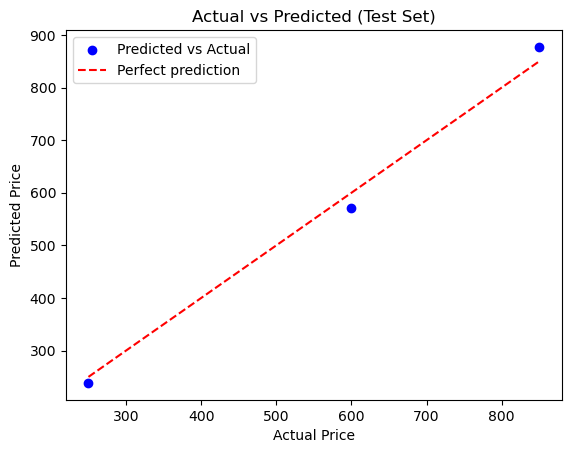

In [8]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.scatter(y_test, y_pred_test, color="blue", label="Predicted vs Actual")

# Draw a diagonal line (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color="red", linestyle="--", label="Perfect prediction")

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted (Test Set)")
plt.legend()
plt.show()


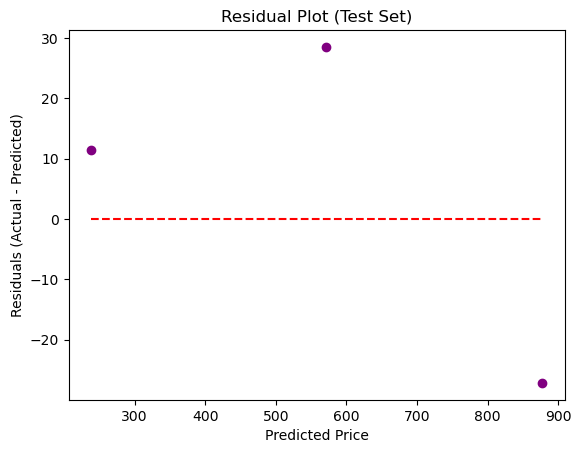

In [9]:
import matplotlib.pyplot as plt

# محاسبه residuals
residuals = y_test - y_pred_test

plt.scatter(y_pred_test, residuals, color='purple')
plt.hlines(y=0, xmin=y_pred_test.min(), xmax=y_pred_test.max(), colors='red', linestyles='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (Test Set)")
plt.show()
